# Homework 1

## Name: Jerry Allan Akshay  
## Github ID: fallen-axe-shay  
## USC ID: 8603760284  

### Import Statements

In [1]:
from scipy.io import arff #Reference: https://discuss.analyticsvidhya.com/t/loading-arff-type-files-in-python/27419
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import numpy as np
from sklearn.metrics import confusion_matrix
import math

### Global Variables

In [2]:
data_path = "../data/vertebral_column_data/column_2C_weka.arff" #Using this file as we need only 2 classes to classify (We don't need Hernia and Spondylolisthesis classes)

data = arff.loadarff(data_path)

data_frame = pd.DataFrame(data[0])

MIN_TRAIN_ERROR_RATE = 1

### Data Pre-processing

In [3]:
data_frame = data_frame.replace(b'Abnormal', 1)
data_frame = data_frame.replace(b'Normal', 0)

### Loaded Data Frame

In [4]:
data_frame

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0


### Answers:

#### 1. b)

#### i. Scatter Plot

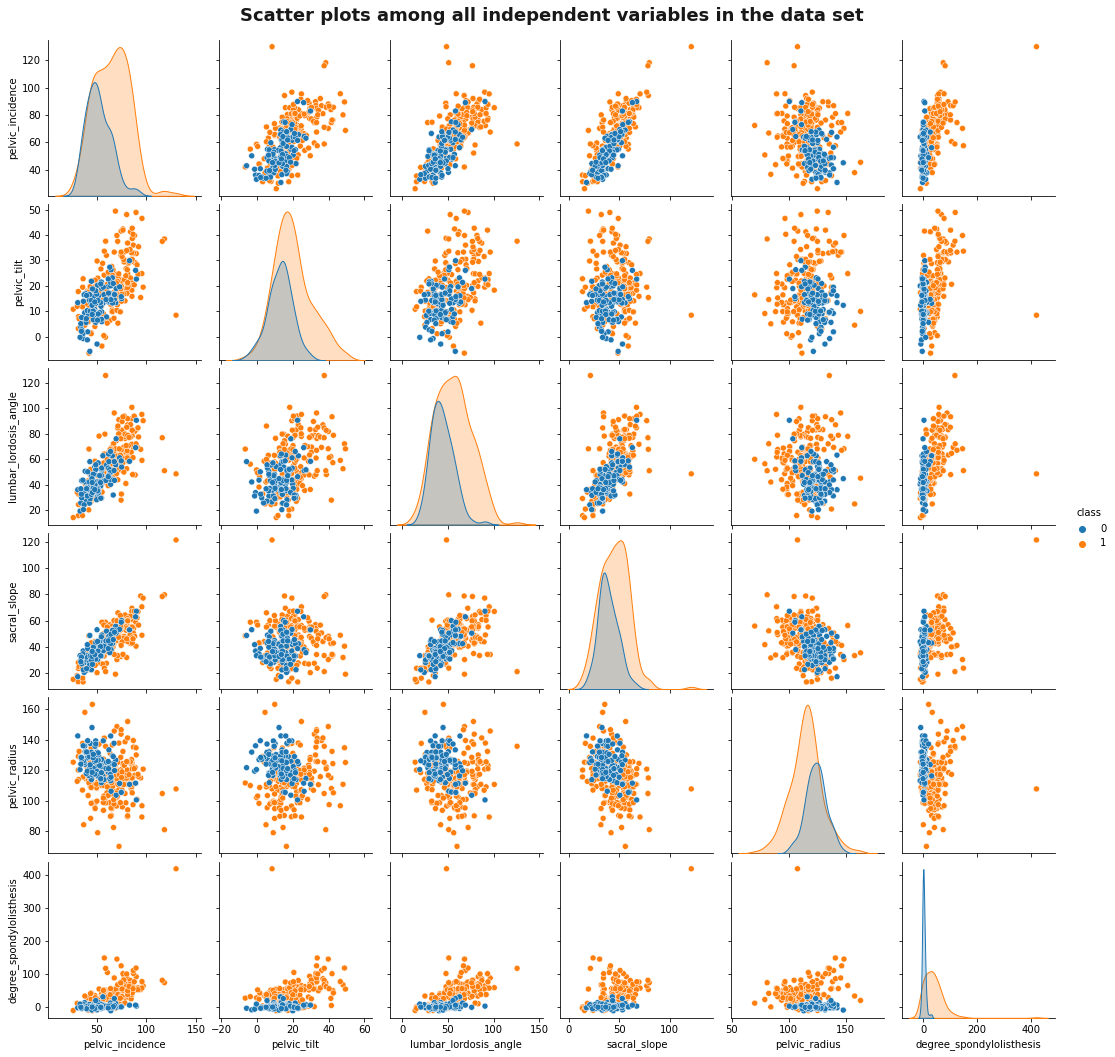

In [5]:
data_frame_copy = data_frame.copy()

pairplot_fig = sns.pairplot(data_frame_copy, hue="class")

plt.subplots_adjust(top=0.95)

pairplot_fig.fig.suptitle("Scatter plots among all independent variables in the data set", fontsize=18, alpha=0.9, weight='bold')

plt.show()

#### ii. Box Plot

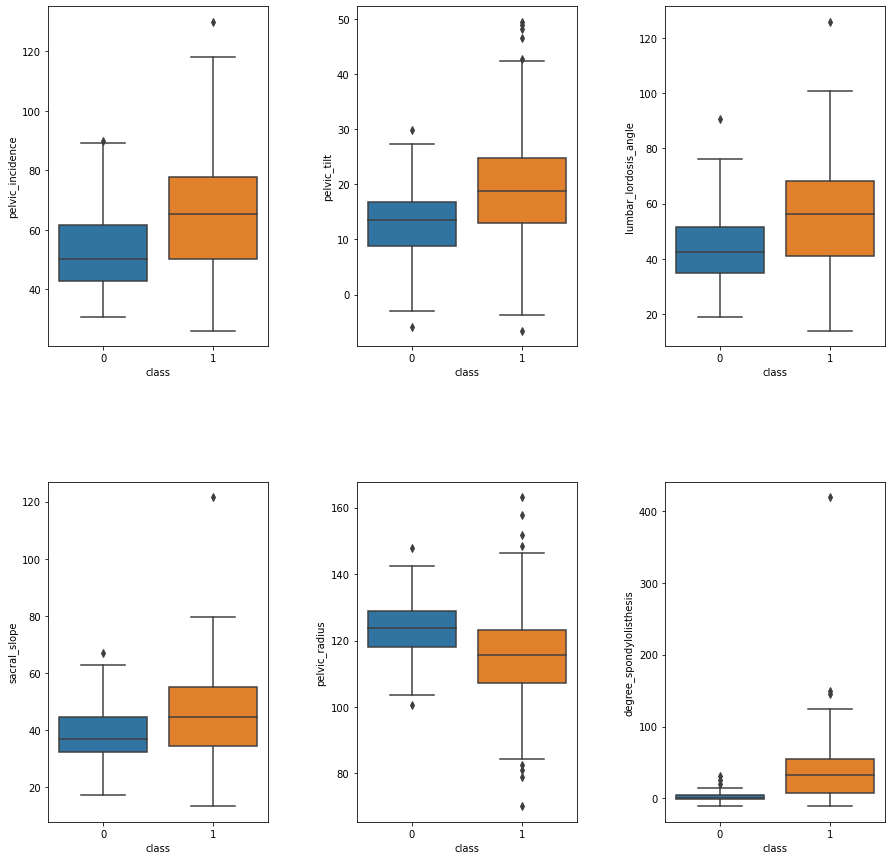

In [6]:
data_frame_copy = data_frame.copy()

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax = fig.add_subplot(2, 3, 1)
sns.boxplot(y="pelvic_incidence", x="class", data=data_frame_copy)
ax = fig.add_subplot(2, 3, 2)
sns.boxplot(y="pelvic_tilt", x="class", data=data_frame_copy)
ax = fig.add_subplot(2, 3, 3)
sns.boxplot(y="lumbar_lordosis_angle", x="class", data=data_frame_copy)
ax = fig.add_subplot(2, 3, 4)
sns.boxplot(y="sacral_slope", x="class", data=data_frame_copy)
ax = fig.add_subplot(2, 3, 5)
sns.boxplot(y="pelvic_radius", x="class", data=data_frame_copy)
ax = fig.add_subplot(2, 3, 6)
sns.boxplot(y="degree_spondylolisthesis", x="class", data=data_frame_copy)


plt.show()

#### iii. Division of Data set into training dataset and test dataset

In [7]:
data_frame_copy = data_frame.copy()

normal_data = data_frame_copy[data_frame_copy['class']==0]

abnormal_data = data_frame_copy[data_frame_copy['class']==1]

training_set = pd.DataFrame()
training_set = training_set.append(normal_data.head(70), ignore_index=True)
training_set = training_set.append(abnormal_data.head(140), ignore_index=True)
training_set = training_set.sample(frac=1).reset_index(drop=True)

test_set = pd.DataFrame()
test_set = test_set.append(normal_data.tail(normal_data.shape[0] - 70), ignore_index=True)
test_set = test_set.append(abnormal_data.tail(abnormal_data.shape[0] - 140), ignore_index=True)
test_set = test_set.sample(frac=1).reset_index(drop=True)

#### Training Set

In [8]:
training_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,44.914149,10.218996,44.630914,34.695154,130.075660,37.364540,1
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,1
2,66.879211,24.891999,49.278597,41.987212,113.477018,-2.005892,1
3,68.613001,15.082235,63.014696,53.530766,123.431174,39.497987,1
4,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,1
...,...,...,...,...,...,...,...
205,35.703458,19.443253,20.700000,16.260205,137.540613,-0.263490,1
206,64.311867,26.328369,50.958964,37.983498,106.177751,3.118221,0
207,78.425951,33.425951,76.277439,45.000000,138.554111,77.155172,1
208,48.332638,22.227784,36.181993,26.104854,117.384625,6.481709,1


#### Test Set

In [9]:
test_set

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,85.680950,38.650035,82.680977,47.030914,120.840707,61.959034,1
1,79.249671,23.944825,40.796698,55.304846,98.622512,36.706395,1
2,34.382299,2.062683,32.390820,32.319617,128.300199,-3.365516,0
3,54.600316,21.488974,29.360216,33.111342,118.343321,-1.471067,0
4,56.535051,14.377189,44.991547,42.157862,101.723334,25.773174,1
...,...,...,...,...,...,...,...
95,33.041688,-0.324678,19.071075,33.366366,120.388611,9.354365,0
96,71.241764,5.268270,85.999584,65.973493,110.703107,38.259864,1
97,71.001941,37.515772,84.537093,33.486169,125.164232,67.771190,1
98,48.995958,13.113820,51.873520,35.882137,126.398188,0.535472,0


#### 1. c)

#### i. KNN Algorithm

In [10]:
def get_knn_model_with_euclidean(n, temp_training_set):
    
    training_set_copy = temp_training_set.copy()
    
    training_set_copy = training_set_copy.drop(labels=['class'], axis=1) #https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

    nbrs = NearestNeighbors(n_neighbors=n, algorithm='auto').fit(training_set_copy)
    
    return nbrs

In [11]:
def compute_pred(model, data, training_data):
    pred = []
    no_of_no = 0
    no_of_ab = 0
    distances, indices = model.kneighbors(data)
    for i in indices:
        no_of_no = 0
        no_of_ab = 0
        for j in i:
            class_of_pt = training_data.iloc[j]['class']
            if class_of_pt==0:
                no_of_no += 1
            else:
                no_of_ab += 1
        if no_of_no >= no_of_ab:
            pred.append(0)
        else:
            pred.append(1)
    return pred

In [12]:
def getAccuracy(data, pred):
    con_mat = confusion_matrix(data, pred)
    TP = con_mat[0][0]
    TN = con_mat[1][1]
    FP = con_mat[1][0]
    FN = con_mat[0][1]
    Accuracy = ((TP + TN)/(TP + TN + FP + FN))
    return Accuracy

#### ii. Plotting of k verses test/train errors

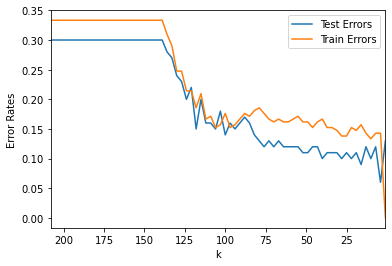

In [13]:
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(labels=['class'], axis=1)
training_set_copy = training_set.copy()
training_set_copy = training_set_copy.drop(labels=['class'], axis=1)

test_class = test_set['class']
train_class = training_set['class']

errors = []
k_values = []

best_k = 1
current_best_test_error = 1

for n in reversed(range(1, 209, 3)):
    k_values.append(n)
    model = get_knn_model_with_euclidean(n, training_set)
    pred = compute_pred(model, test_set_copy, training_set)
    test_error = 1 - getAccuracy(test_set['class'], pred)
    if test_error<=current_best_test_error:
        current_best_test_error = test_error
        best_k = n
    pred = compute_pred(model, training_set_copy, training_set)
    train_error = 1 - getAccuracy(training_set['class'], pred)
    MIN_TRAIN_ERROR_RATE = min(MIN_TRAIN_ERROR_RATE, train_error)
    errors.append({'train_error': train_error, 'test_error': test_error})

plt.plot(k_values, [x['test_error'] for x in errors], label = "Test Errors")
plt.plot(k_values, [x['train_error'] for x in errors], label = "Train Errors")
plt.legend()
plt.xlabel('k')
plt.ylabel('Error Rates')
plt.xlim(max(k_values), min(k_values))
plt.show()

#### Further inspection of graph

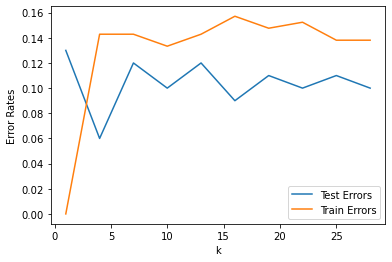

In [14]:
plt.plot(k_values[-10:], [x['test_error'] for x in errors[-10:]], label = "Test Errors")
plt.plot(k_values[-10:], [x['train_error'] for x in errors[-10:]], label = "Train Errors")
plt.legend()
plt.xlabel('k')
plt.ylabel('Error Rates')
plt.show()

#### Best K Value

In [15]:
print(best_k)

4


From the above graph and computed 'best k value', we can see that the best k* is 4

#### Confusion Matrix

<AxesSubplot:>

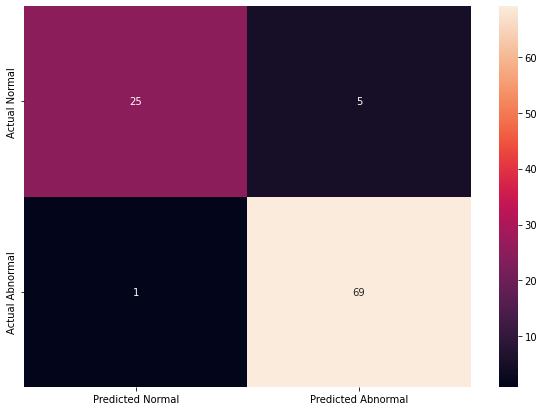

In [16]:
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(labels=['class'], axis=1)
model = get_knn_model_with_euclidean(best_k, training_set)
pred = compute_pred(model, test_set_copy, training_set)
con_mat = confusion_matrix(test_set['class'], pred)

df_cm = pd.DataFrame(con_mat, index = ['Actual Normal', 'Actual Abnormal'], columns = ['Predicted Normal', 'Predicted Abnormal'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

In [17]:
TP = con_mat[0][0]
TN = con_mat[1][1]
FP = con_mat[1][0]
FN = con_mat[0][1]

TPR = (TP/(TP + FN))
TNR = (TN/(TN + FP))
Prec_no = TP/(TP + FP)
Prec_ab = TN/(TN + FN)
Accuracy = ((TP + TN)/(TP + TN + FP + FN))
Error_rate = 1-Accuracy
F1_no = 2 * (Prec_no * TPR) / (Prec_no + TPR)
F1_ab = 2 * (Prec_ab * TNR) / (Prec_ab + TNR)

data_to_show = {'Parameter': ['True Positive Rate', 'True Negative Rate', 'Precision of Classifying Normal', 'Precision of Classifying Abnormal', 'Accuracy', 'Error Rate', 'F-1 Score (if Normal is considered positive)', 'F-1 Score (if Abnormal is considered positive)'],
               'Value': ["{:.2f}".format(TPR), "{:.2f}".format(TNR), "{:.2f}".format(Prec_no), "{:.2f}".format(Prec_ab), "{:.2f}".format(Accuracy), "{:.2f}".format(Error_rate), "{:.2f}".format(F1_no), "{:.2f}".format(F1_ab)]}
data_to_show = pd.DataFrame(data_to_show)
data_to_show = data_to_show.set_index('Parameter')
data_to_show

,Value
Parameter,
True Positive Rate,0.83
True Negative Rate,0.99
Precision of Classifying Normal,0.96
Precision of Classifying Abnormal,0.93
Accuracy,0.94
Error Rate,0.06
F-1 Score (if Normal is considered positive),0.89
F-1 Score (if Abnormal is considered positive),0.96


#### iii. Learning Curve Data 

In [18]:
temp_normal = training_set[training_set['class']==0]
temp_abnormal = training_set[training_set['class']==1]
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(labels=['class'], axis=1)
plot_points = []
for k in range(1, 197, 5):
    for n in range(10, 211, 10):
        try:
            to_choose_no = math.floor(n/3)
            to_choose_ab = n - to_choose_no
            temp_training_set = pd.DataFrame()
            temp_training_set = temp_training_set.append(temp_normal.head(to_choose_no), ignore_index=True)
            temp_training_set = temp_training_set.append(temp_abnormal.head(to_choose_ab), ignore_index=True)
            temp_training_set = temp_training_set.sample(frac=1).reset_index(drop=True)
            temp_training_set_copy = temp_training_set.copy().drop(labels=['class'], axis=1)
            model = get_knn_model_with_euclidean(k, temp_training_set)
            pred = compute_pred(model, test_set_copy, temp_training_set)
            Error_rate = 1 - getAccuracy(test_set['class'], pred)
            plot_points.append([n, Error_rate, k])
            pred = compute_pred(model, temp_training_set_copy, temp_training_set)
            Error_rate = 1 - getAccuracy(temp_training_set['class'], pred)
            MIN_TRAIN_ERROR_RATE = min(MIN_TRAIN_ERROR_RATE, Error_rate)
        except:
            pass

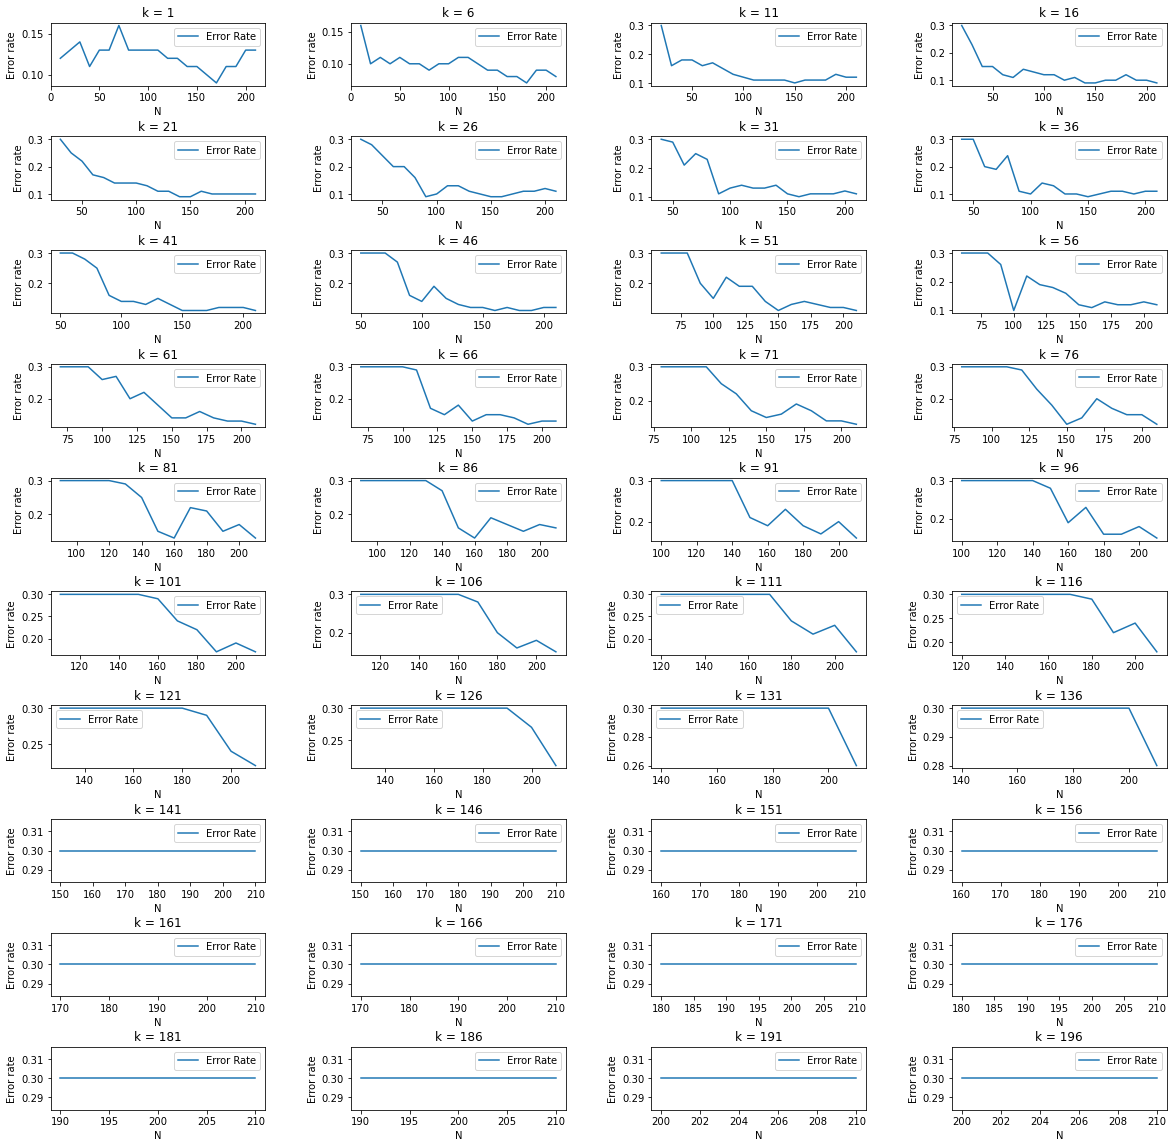

In [19]:
fig, ax = plt.subplots(10, 4, figsize=(20,20))
fig.subplots_adjust(hspace=0.8, wspace=0.4)

y_count = 0
x_count = 0

k_vs_error = {}
n_vs_optimal_k = {}
n_vs_best_errors = {}

for n in range(10, 211, 10):
    n_vs_optimal_k[n] = min(filter(lambda y: y[0]==n, plot_points), key = lambda z: z[1])[2]
    n_vs_best_errors[n] = min(filter(lambda y: y[0]==n, plot_points), key = lambda z: z[1])[1]

for k in range(1, 197, 5):
    k_vs_error[k] = min([x[1] for x in filter(lambda y: y[2]==k, plot_points)])
    ax[y_count][x_count].plot([x[0] for x in filter(lambda y: y[2]==k, plot_points)], [x[1] for x in filter(lambda y: y[2]==k, plot_points)], label = "Error Rate")
    ax[y_count][x_count].legend()
    ax[y_count][x_count].set_title('k = ' + str(k))
    ax[y_count][x_count].set_xlabel('N')
    ax[y_count][x_count].set_ylabel('Error rate')
    x_count += 1
    if(x_count)>=4:
        x_count = 0
        y_count += 1

plt.show()

#### K vs Best Error Rate

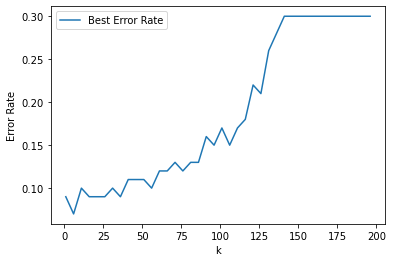

In [20]:
x = []
y = []
for item in k_vs_error.keys():
    x.append(item)
    y.append(k_vs_error[item])
plt.plot(x, y, label = "Best Error Rate")
plt.xlabel("k")
plt.ylabel("Error Rate")
plt.legend()
plt.show()

#### N vs Optimal K

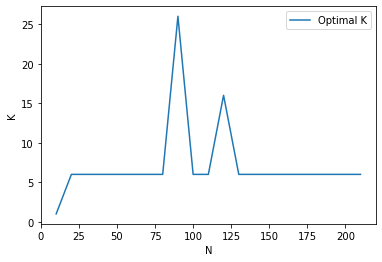

In [21]:
x = []
y = []
for item in n_vs_optimal_k.keys():
    x.append(item)
    y.append(n_vs_optimal_k[item])
plt.plot(x, y, label = "Optimal K")
plt.xlabel("N")
plt.ylabel("K")
plt.legend()
plt.show()

#### N vs Best Error Rates

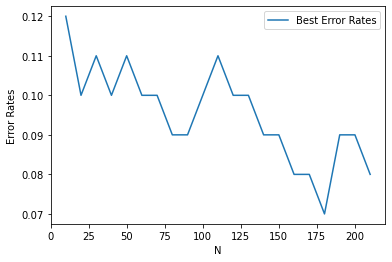

In [22]:
x = []
y = []
for item in n_vs_best_errors.keys():
    x.append(item)
    y.append(n_vs_best_errors[item])
plt.plot(x, y, label = "Best Error Rates")
plt.xlabel("N")
plt.ylabel("Error Rates")
plt.legend()
plt.show()

#### 1. d)

#### i. Minkowski Distance

#### A. Manhattan Distance

In [23]:
def get_knn_model_with_manhattan(n, temp_training_set):
    
    training_set_copy = temp_training_set.copy()
    
    training_set_copy = training_set_copy.drop(labels=['class'], axis=1) #https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

    nbrs = NearestNeighbors(n_neighbors=n, algorithm='auto', p=1).fit(training_set_copy)
    
    return nbrs

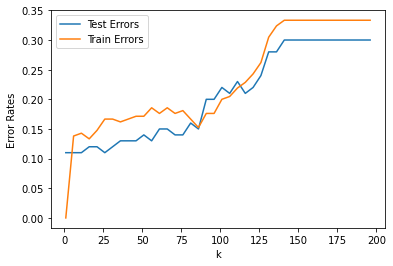

In [24]:
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(labels=['class'], axis=1)
training_set_copy = training_set.copy()
training_set_copy = training_set_copy.drop(labels=['class'], axis=1)

test_class = test_set['class']
train_class = training_set['class']

errors = []
k_values = []

best_manhattan_k = 1
current_best_test_error_manhattan = 1

for n in range(1, 197, 5):
    k_values.append(n)
    model = get_knn_model_with_manhattan(n, training_set)
    pred = compute_pred(model, test_set_copy, training_set)
    test_error = 1 - getAccuracy(test_set['class'], pred)
    if test_error<=current_best_test_error_manhattan:
        current_best_test_error_manhattan = test_error
        best_manhattan_k = n
    pred = compute_pred(model, training_set_copy, training_set)
    train_error = 1 - getAccuracy(training_set['class'], pred)
    MIN_TRAIN_ERROR_RATE = min(MIN_TRAIN_ERROR_RATE, train_error)
    errors.append({'train_error': train_error, 'test_error': test_error})

plt.plot(k_values, [x['test_error'] for x in errors], label = "Test Errors")
plt.plot(k_values, [x['train_error'] for x in errors], label = "Train Errors")
plt.xlabel('k')
plt.ylabel('Error Rates')
plt.legend()
plt.show()

#### B. Minkowski Distance with log<sub>10</sub>(p)

In [25]:
def get_knn_model_with_logp(n, temp_training_set, p):
    
    training_set_copy = temp_training_set.copy()
    
    training_set_copy = training_set_copy.drop(labels=['class'], axis=1) #https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

    nbrs = NearestNeighbors(n_neighbors=n, algorithm='auto', p=p).fit(training_set_copy)
    
    return nbrs

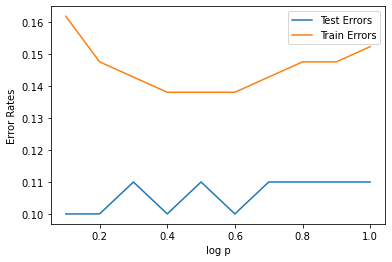

In [26]:
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(labels=['class'], axis=1)
training_set_copy = training_set.copy()
training_set_copy = training_set_copy.drop(labels=['class'], axis=1)

test_class = test_set['class']
train_class = training_set['class']

errors = []
p_values = []

best_log_p = 0.1
current_best_test_error_logp = 1

for i in range(1, 11, 1):
    p = 10**(i/10)
    p_values.append(math.log10(p))
    model = get_knn_model_with_logp(best_manhattan_k, training_set, p)
    pred = compute_pred(model, test_set_copy, training_set)
    test_error = 1 - getAccuracy(test_set['class'], pred)
    if test_error<=current_best_test_error_logp:
        current_best_test_error_logp = test_error
        best_log_p = math.log10(p)
    pred = compute_pred(model, training_set_copy, training_set)
    train_error = 1 - getAccuracy(training_set['class'], pred)
    MIN_TRAIN_ERROR_RATE = min(MIN_TRAIN_ERROR_RATE, train_error)
    errors.append({'train_error': train_error, 'test_error': test_error})

plt.plot(p_values, [x['test_error'] for x in errors], label = "Test Errors")
plt.plot(p_values, [x['train_error'] for x in errors], label = "Train Errors")
plt.legend()
plt.xlabel('log p')
plt.ylabel('Error Rates')
plt.show()

#### C. Chebyshev Distance

In [27]:
def get_knn_model_with_chebyshev(n, temp_training_set):
    
    training_set_copy = temp_training_set.copy()
    
    training_set_copy = training_set_copy.drop(labels=['class'], axis=1) #https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe

    nbrs = NearestNeighbors(n_neighbors=n, algorithm='auto', metric='chebyshev').fit(training_set_copy)
    
    return nbrs

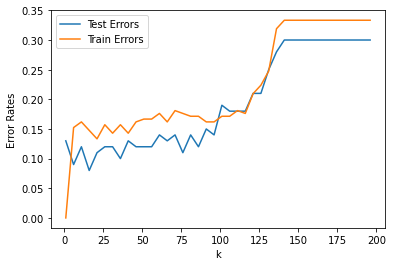

In [28]:
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(labels=['class'], axis=1)
training_set_copy = training_set.copy()
training_set_copy = training_set_copy.drop(labels=['class'], axis=1)

test_class = test_set['class']
train_class = training_set['class']

errors = []
k_values = []

best_chebyshev_k = 1
current_best_test_error_chebyshev = 1

for n in range(1, 197, 5):
    k_values.append(n)
    model = get_knn_model_with_chebyshev(n, training_set)
    pred = compute_pred(model, test_set_copy, training_set)
    test_error = 1 - getAccuracy(test_set['class'], pred)
    if test_error<=current_best_test_error_chebyshev:
        current_best_test_error_chebyshev = test_error
        best_chebyshev_k = n
    pred = compute_pred(model, training_set_copy, training_set)
    train_error = 1 - getAccuracy(training_set['class'], pred)
    MIN_TRAIN_ERROR_RATE = min(MIN_TRAIN_ERROR_RATE, train_error)
    errors.append({'train_error': train_error, 'test_error': test_error})

plt.plot(k_values, [x['test_error'] for x in errors], label = "Test Errors")
plt.plot(k_values, [x['train_error'] for x in errors], label = "Train Errors")
plt.legend()
plt.xlabel('k')
plt.ylabel('Error Rates')
plt.show()

#### ii. Mahalanobis Distance

In [29]:
def get_knn_model_with_mahalanobis(n, temp_training_set):
    
    training_set_copy = temp_training_set.copy()
    
    training_set_copy = training_set_copy.drop(labels=['class'], axis=1) #https://stackoverflow.com/questions/13411544/delete-a-column-from-a-pandas-dataframe
    
    covMatrix = np.cov(training_set_copy, rowvar=False)
    
    covInv = np.linalg.inv(covMatrix)

    nbrs = NearestNeighbors(n_neighbors=n, algorithm='auto', metric='mahalanobis', metric_params={'VI': covInv}).fit(training_set_copy)
    
    return nbrs

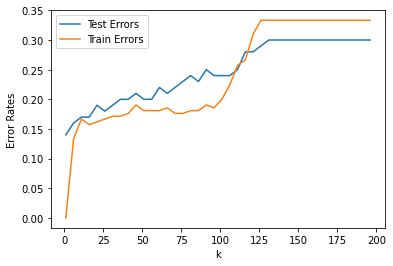

In [30]:
test_set_copy = test_set.copy()
test_set_copy = test_set_copy.drop(labels=['class'], axis=1)
training_set_copy = training_set.copy()
training_set_copy = training_set_copy.drop(labels=['class'], axis=1)

test_class = test_set['class']
train_class = training_set['class']

errors = []
k_values = []

best_mahalanobis_k = 1
current_best_test_error_mahalanobis = 1

for n in range(1, 197, 5):
    k_values.append(n)
    model = get_knn_model_with_mahalanobis(n, training_set)
    pred = compute_pred(model, test_set_copy, training_set)
    test_error = 1 - getAccuracy(test_set['class'], pred)
    if test_error<=current_best_test_error_mahalanobis:
        current_best_test_error_mahalanobis = test_error
        best_mahalanobis_k = n
    pred = compute_pred(model, training_set_copy, training_set)
    train_error = 1 - getAccuracy(training_set['class'], pred)
    MIN_TRAIN_ERROR_RATE = min(MIN_TRAIN_ERROR_RATE, train_error)
    errors.append({'train_error': train_error, 'test_error': test_error})

plt.plot(k_values, [x['test_error'] for x in errors], label = "Test Errors")
plt.plot(k_values, [x['train_error'] for x in errors], label = "Train Errors")
plt.legend()
plt.xlabel('k')
plt.ylabel('Error Rates')
plt.show()

#### Summary

In [31]:
summary_data = {'KNN Distance Metric':  ['Euclidean', 'Manhattan', 'Minkowski with Variable Log P', 'Chebyshev', 'Mahalanobis'],
        'Optimum K': [best_k, best_manhattan_k, best_manhattan_k, best_chebyshev_k, best_mahalanobis_k],
        'Log P' : ['N/A', 'N/A', best_log_p, 'N/A', 'N/A'],
         'Best Error Rates' : [current_best_test_error, current_best_test_error_manhattan, current_best_test_error_logp, current_best_test_error_chebyshev, current_best_test_error_mahalanobis]
        }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('KNN Distance Metric')

,Optimum K,Log P,Best Error Rates
KNN Distance Metric,,,
Euclidean,4,N/A,0.06
Manhattan,26,N/A,0.11
Minkowski with Variable Log P,26,0.6,0.10
Chebyshev,16,N/A,0.08
Mahalanobis,1,N/A,0.14


#### 1. e) Weighted Majority Polling

In [32]:
def compute_pred_weighted(model, data, training_data):
    pred = []
    no_of_no = 0
    no_of_ab = 0
    distances, indices = model.kneighbors(data)
    for i in range(len(indices)):
        no_of_no = 0
        no_of_ab = 0
        for j in range(len(indices[i])):
            class_of_pt = training_data.iloc[indices[i][j]]['class']
            if class_of_pt==0:
                if distances[i][j]!=0:
                    no_of_no += 1*(1/distances[i][j])
            else:
                if distances[i][j]!=0:
                    no_of_ab += 1*(1/distances[i][j])
        if no_of_no >= no_of_ab:
            pred.append(0)
        else:
            pred.append(1)
    return pred

In [33]:
def get_chebyshev_error():
    test_set_copy = test_set.copy()
    test_set_copy = test_set_copy.drop(labels=['class'], axis=1)
    training_set_copy = training_set.copy()
    training_set_copy = training_set_copy.drop(labels=['class'], axis=1)

    test_class = test_set['class']
    train_class = training_set['class']
    
    current_best_test_error_chebyshev = 1
    
    global MIN_TRAIN_ERROR_RATE
    
    for n in range(1, 197, 5):
        model = get_knn_model_with_chebyshev(n, training_set)
        pred = compute_pred_weighted(model, test_set_copy, training_set)
        test_error = 1 - getAccuracy(test_set['class'], pred)
        if test_error<=current_best_test_error_chebyshev:
            current_best_test_error_chebyshev = test_error
        pred = compute_pred_weighted(model, training_set_copy, training_set)
        train_error = 1 - getAccuracy(training_set['class'], pred)
        MIN_TRAIN_ERROR_RATE = min(MIN_TRAIN_ERROR_RATE, train_error)
    return current_best_test_error_chebyshev

In [34]:
def get_manhattan_error():
    test_set_copy = test_set.copy()
    test_set_copy = test_set_copy.drop(labels=['class'], axis=1)
    training_set_copy = training_set.copy()
    training_set_copy = training_set_copy.drop(labels=['class'], axis=1)

    test_class = test_set['class']
    train_class = training_set['class']

    current_best_test_error_manhattan = 1
    
    global MIN_TRAIN_ERROR_RATE
    
    for n in range(1, 197, 5):
        model = get_knn_model_with_manhattan(n, training_set)
        pred = compute_pred_weighted(model, test_set_copy, training_set)
        test_error = 1 - getAccuracy(test_set['class'], pred)
        if test_error<=current_best_test_error_manhattan:
            current_best_test_error_manhattan = test_error
        pred = compute_pred_weighted(model, training_set_copy, training_set)
        train_error = 1 - getAccuracy(training_set['class'], pred)
        MIN_TRAIN_ERROR_RATE = min(MIN_TRAIN_ERROR_RATE, train_error)
    return current_best_test_error_manhattan

In [35]:
def get_euclidean_error():
    test_set_copy = test_set.copy()
    test_set_copy = test_set_copy.drop(labels=['class'], axis=1)
    training_set_copy = training_set.copy()
    training_set_copy = training_set_copy.drop(labels=['class'], axis=1)

    test_class = test_set['class']
    train_class = training_set['class']

    current_best_test_error = 1
    
    global MIN_TRAIN_ERROR_RATE
    
    for n in range(1, 197, 5):
        model = get_knn_model_with_euclidean(n, training_set)
        pred = compute_pred_weighted(model, test_set_copy, training_set)
        test_error = 1 - getAccuracy(test_set['class'], pred)
        if test_error<=current_best_test_error:
            current_best_test_error = test_error
        pred = compute_pred_weighted(model, training_set_copy, training_set)
        test_error = 1 - getAccuracy(training_set['class'], pred)
        MIN_TRAIN_ERROR_RATE = min(MIN_TRAIN_ERROR_RATE, test_error)
    return current_best_test_error

#### Summary of Weighted Polling Results

In [36]:
summary_data = {'KNN Distance Metric':  ['Euclidean', 'Manhattan', 'Chebyshev'],
         'Best Error Rates' : [get_euclidean_error(), get_manhattan_error(), get_chebyshev_error()]
        }

summary_df = pd.DataFrame(summary_data)
summary_df.set_index('KNN Distance Metric')

,Best Error Rates
KNN Distance Metric,
Euclidean,0.10
Manhattan,0.10
Chebyshev,0.11


#### 1. f) Lowest Training Error Rate

In [37]:
print(MIN_TRAIN_ERROR_RATE)

0.0


#### Lowest Training Error Rate found is 0.0